<a href="https://colab.research.google.com/github/Sameersah/dimentionality-reduction/blob/main/Dimensionality_Reduction_Techniques_and_Their_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up the Environment and Loading Datasets

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

# Load Tabular Dataset (Iris)
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_target = iris.target

# Normalize the tabular data
scaler = StandardScaler()
iris_data_scaled = scaler.fit_transform(iris_data)

# Load Image Dataset (MNIST)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize image data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Flatten and scale
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

print("Tabular Data Shape:", iris_data_scaled.shape)
print("Image Data Shape:", X_train.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Tabular Data Shape: (150, 4)
Image Data Shape: (60000, 784)


# Implement and Visualize Dimensionality Reduction Techniques

## Locally Linear Embedding (LLE)
LLE preserves the local neighborhood relationships by modeling each data point as a linear combination of its neighbors.

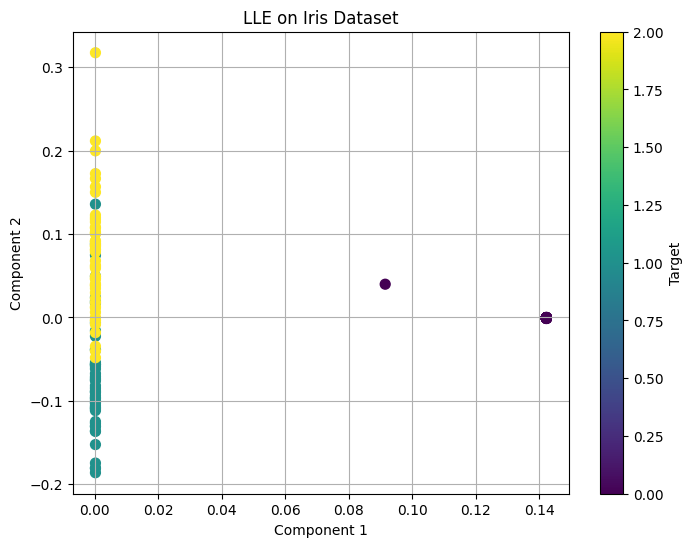

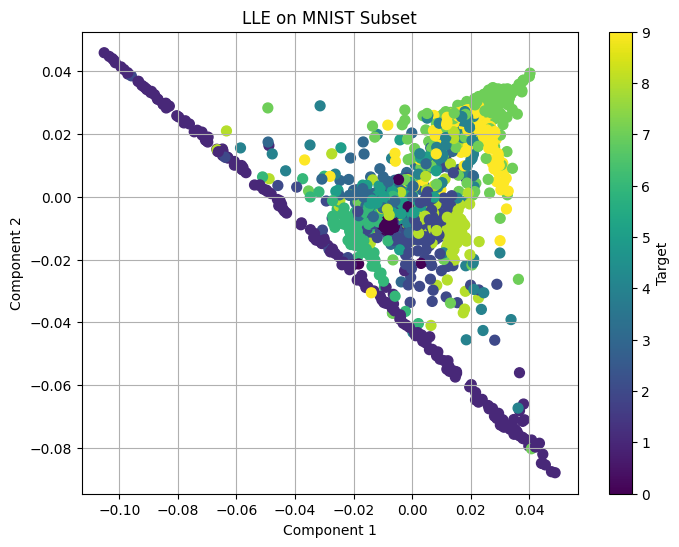

In [3]:
from sklearn.manifold import LocallyLinearEmbedding

# Define a function to apply LLE and visualize results
def apply_lle(data, target, n_neighbors=10, n_components=3, title="LLE Visualization"):
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
    reduced_data = lle.fit_transform(data)

    # Visualize results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Target')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# Apply LLE on Iris dataset
apply_lle(iris_data_scaled, iris_target, title="LLE on Iris Dataset")

# Apply LLE on MNIST (subset of 2000 samples for faster computation)
subset_size = 2000
apply_lle(X_train[:subset_size], y_train[:subset_size], title="LLE on MNIST Subset")



## t-SNE
t-SNE (t-Distributed Stochastic Neighbor Embedding) is another dimensionality reduction technique used for visualization. It focuses on preserving local similarities by modeling high-dimensional relationships probabilistically in the lower-dimensional space.

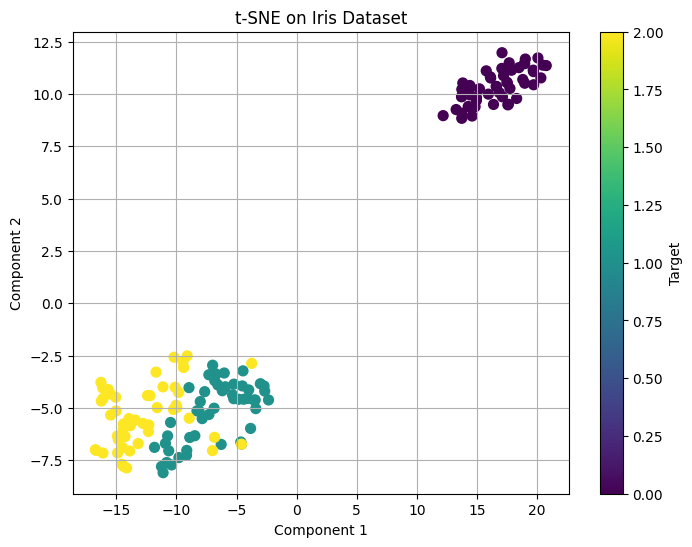

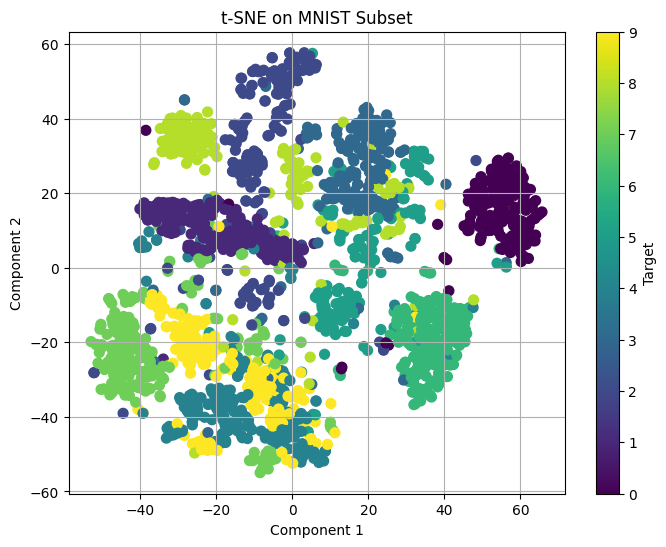

In [4]:
from sklearn.manifold import TSNE

# Define a function to apply t-SNE and visualize results
def apply_tsne(data, target, n_components=2, perplexity=30, learning_rate=200, title="t-SNE Visualization"):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
    reduced_data = tsne.fit_transform(data)

    # Visualize results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Target')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# Apply t-SNE on Iris dataset
apply_tsne(iris_data_scaled, iris_target, title="t-SNE on Iris Dataset")

# Apply t-SNE on MNIST (subset of 2000 samples for faster computation)
apply_tsne(X_train[:subset_size], y_train[:subset_size], title="t-SNE on MNIST Subset")


## Apply ISOMAP
ISOMAP (Isometric Mapping) is a non-linear dimensionality reduction technique that extends Multi-Dimensional Scaling (MDS). It preserves the global geometry of data by approximating geodesic distances (shortest paths along a manifold).

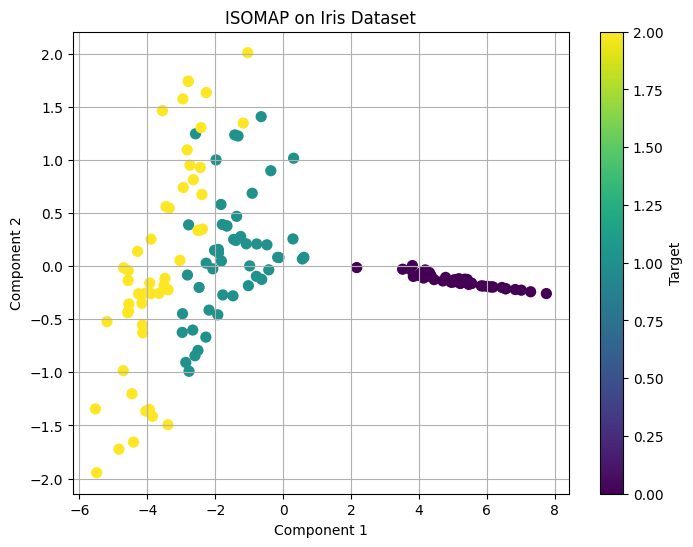

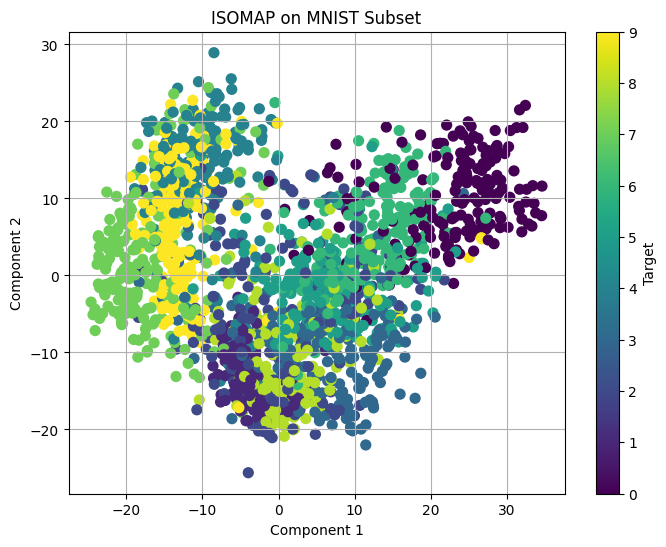

In [5]:
from sklearn.manifold import Isomap

# Define a function to apply ISOMAP and visualize results
def apply_isomap(data, target, n_neighbors=5, n_components=2, title="ISOMAP Visualization"):
    isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
    reduced_data = isomap.fit_transform(data)

    # Visualize results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Target')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# Apply ISOMAP on Iris dataset
apply_isomap(iris_data_scaled, iris_target, title="ISOMAP on Iris Dataset")

# Apply ISOMAP on MNIST (subset of 2000 samples for faster computation)
apply_isomap(X_train[:subset_size], y_train[:subset_size], title="ISOMAP on MNIST Subset")



## Apply UMAP

UMAP (Uniform Manifold Approximation and Projection) is a non-linear dimensionality reduction technique designed for faster computation and better preservation of both local and global data structures.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


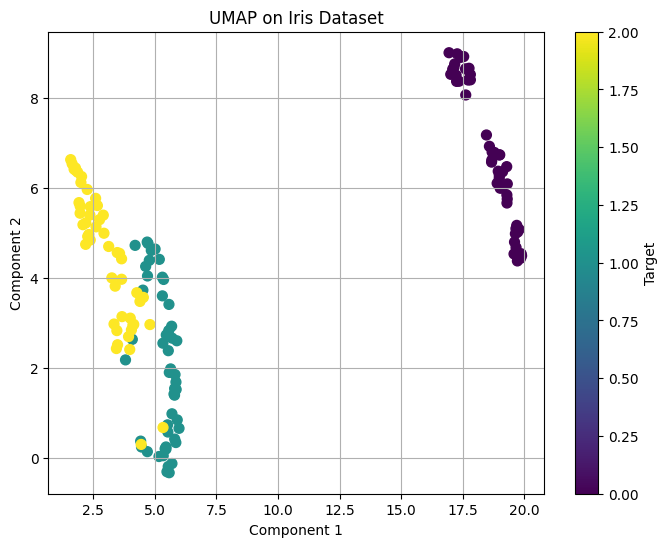

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


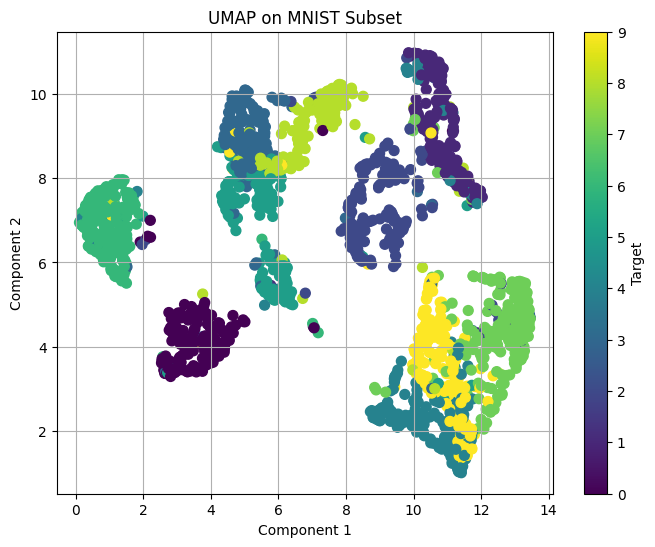

In [8]:

!pip install umap-learn

import umap.umap_ as umap

# Define a function to apply UMAP and visualize results
def apply_umap(data, target, n_neighbors=15, n_components=2, min_dist=0.1, title="UMAP Visualization"):
    umap_model = umap.UMAP(n_neighbors=n_neighbors, n_components=n_components, min_dist=min_dist, random_state=42)
    reduced_data = umap_model.fit_transform(data)

    # Visualize results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Target')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# Apply UMAP on Iris dataset
apply_umap(iris_data_scaled, iris_target, title="UMAP on Iris Dataset")

# Apply UMAP on MNIST (subset of 2000 samples for faster computation)
apply_umap(X_train[:subset_size], y_train[:subset_size], title="UMAP on MNIST Subset")


## Apply MDS (Multi-Dimensional Scaling)

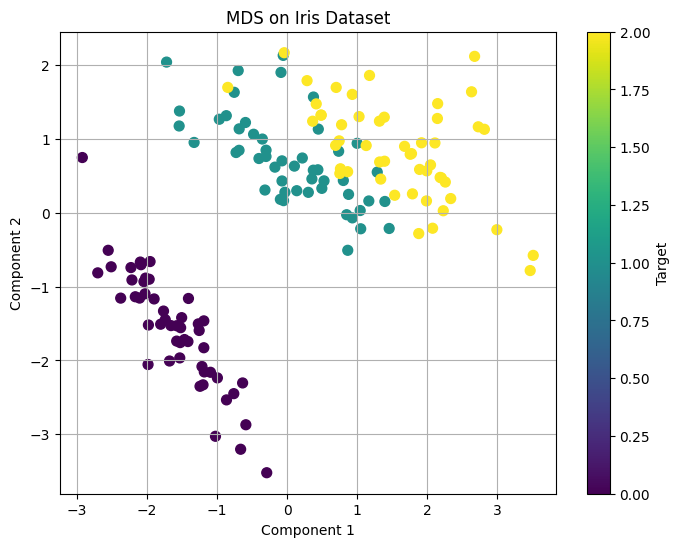

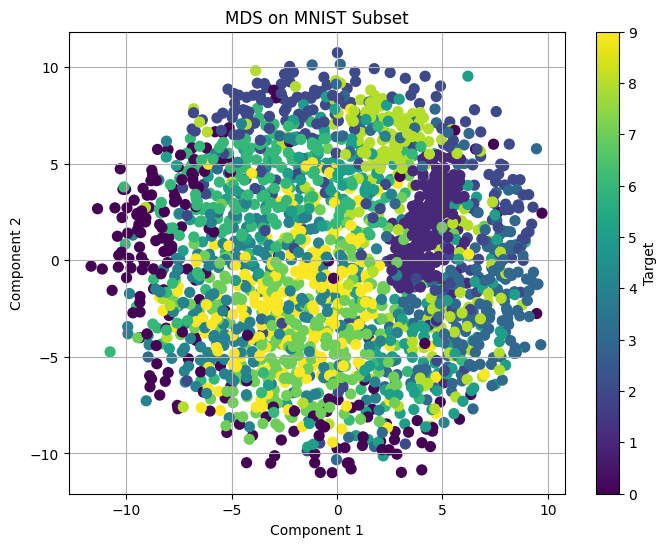

In [9]:
from sklearn.manifold import MDS

# Define a function to apply MDS and visualize results
def apply_mds(data, target, n_components=2, title="MDS Visualization"):
    mds = MDS(n_components=n_components, random_state=42)
    reduced_data = mds.fit_transform(data)

    # Visualize results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Target')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# Apply MDS on Iris dataset
apply_mds(iris_data_scaled, iris_target, title="MDS on Iris Dataset")

# Apply MDS on MNIST (subset of 2000 samples for faster computation)
apply_mds(X_train[:subset_size], y_train[:subset_size], title="MDS on MNIST Subset")


## Randomised PCA

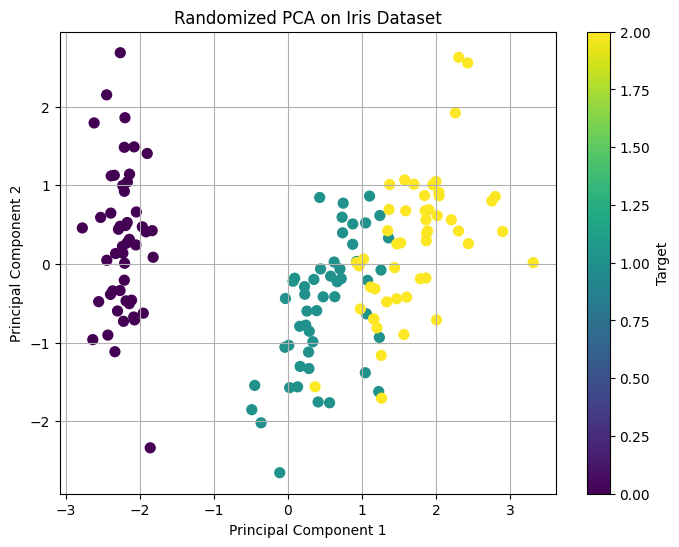

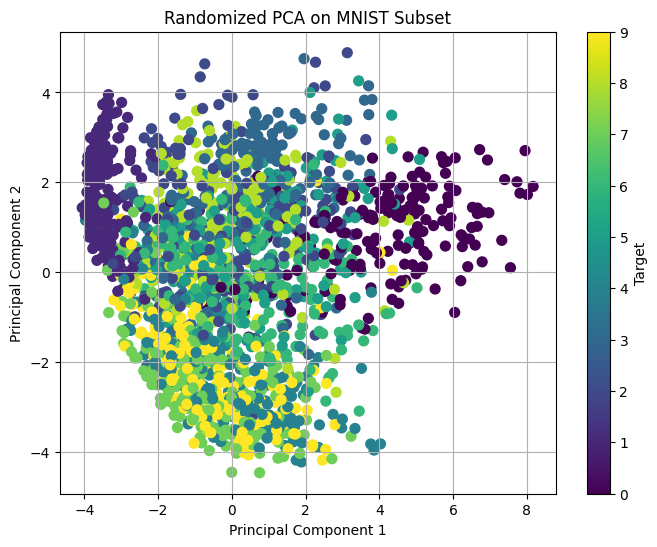

In [11]:
from sklearn.decomposition import PCA

# Define a function to apply Randomized PCA and visualize results
def apply_randomized_pca(data, target, n_components=2, title="Randomized PCA Visualization"):
    pca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
    reduced_data = pca.fit_transform(data)

    # Visualize results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Target')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

# Apply Randomized PCA on Iris dataset
apply_randomized_pca(iris_data_scaled, iris_target, title="Randomized PCA on Iris Dataset")

# Apply Randomized PCA on MNIST (subset of 2000 samples for faster computation)
apply_randomized_pca(X_train[:subset_size], y_train[:subset_size], title="Randomized PCA on MNIST Subset")


## Apply Kernel PCA

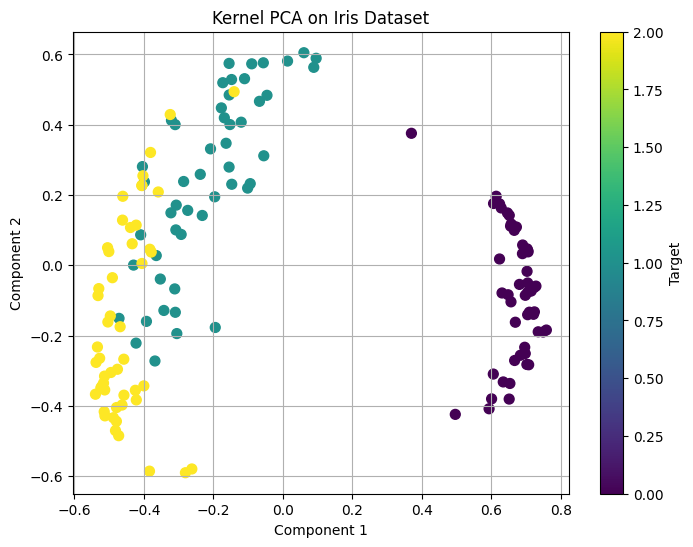

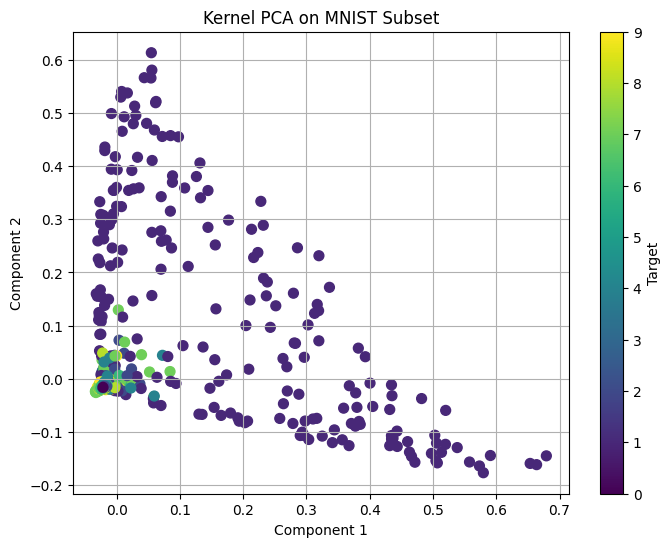

In [12]:
from sklearn.decomposition import KernelPCA

# Define a function to apply Kernel PCA and visualize results
def apply_kernel_pca(data, target, kernel='rbf', n_components=2, gamma=0.1, title="Kernel PCA Visualization"):
    kpca = KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma)
    reduced_data = kpca.fit_transform(data)

    # Visualize results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Target')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# Apply Kernel PCA on Iris dataset
apply_kernel_pca(iris_data_scaled, iris_target, kernel='rbf', gamma=0.1, title="Kernel PCA on Iris Dataset")

# Apply Kernel PCA on MNIST (subset of 2000 samples for faster computation)
apply_kernel_pca(X_train[:subset_size], y_train[:subset_size], kernel='rbf', gamma=0.1, title="Kernel PCA on MNIST Subset")


## Apply Incremental PCA

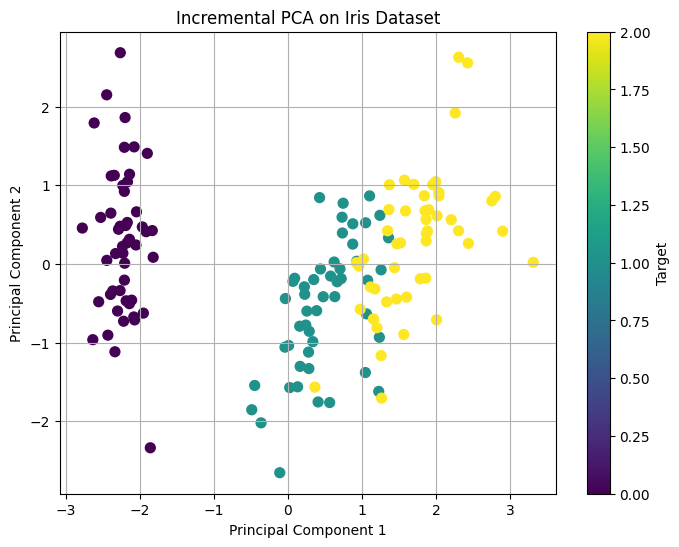

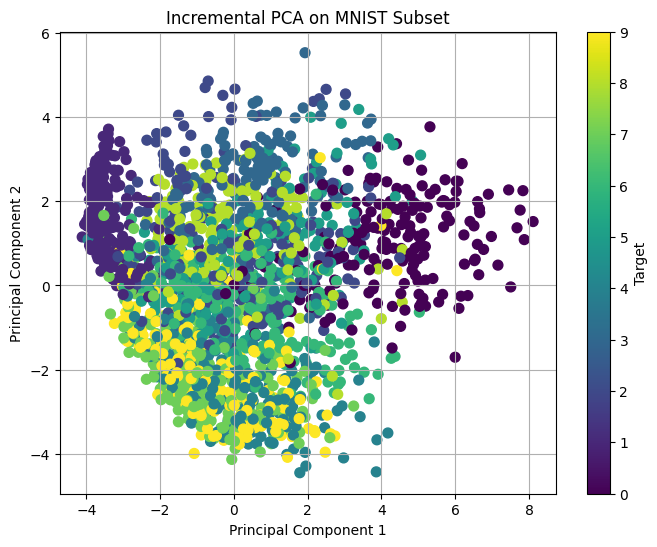

In [13]:
from sklearn.decomposition import IncrementalPCA

# Define a function to apply Incremental PCA and visualize results
def apply_incremental_pca(data, target, n_components=2, batch_size=None, title="Incremental PCA Visualization"):
    ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
    reduced_data = ipca.fit_transform(data)

    # Visualize results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Target')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

# Apply Incremental PCA on Iris dataset
apply_incremental_pca(iris_data_scaled, iris_target, title="Incremental PCA on Iris Dataset")

# Apply Incremental PCA on MNIST (subset of 2000 samples for faster computation)
apply_incremental_pca(X_train[:subset_size], y_train[:subset_size], batch_size=500, title="Incremental PCA on MNIST Subset")


## Apply Factor Analysis

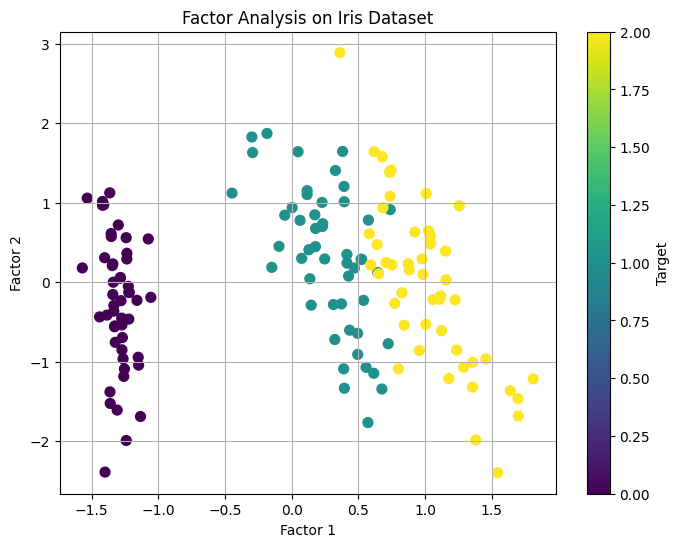

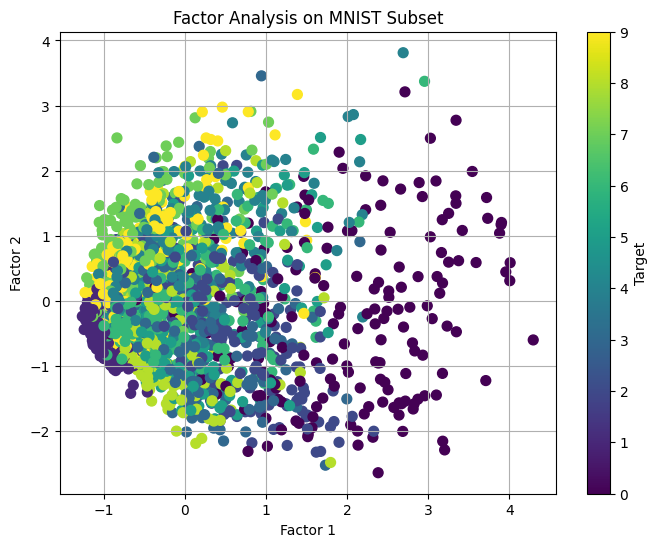

In [14]:
from sklearn.decomposition import FactorAnalysis

# Define a function to apply Factor Analysis and visualize results
def apply_factor_analysis(data, target, n_components=2, title="Factor Analysis Visualization"):
    fa = FactorAnalysis(n_components=n_components, random_state=42)
    reduced_data = fa.fit_transform(data)

    # Visualize results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Target')
    plt.title(title)
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')
    plt.grid(True)
    plt.show()

# Apply Factor Analysis on Iris dataset
apply_factor_analysis(iris_data_scaled, iris_target, title="Factor Analysis on Iris Dataset")

# Apply Factor Analysis on MNIST (subset of 2000 samples for faster computation)
apply_factor_analysis(X_train[:subset_size], y_train[:subset_size], title="Factor Analysis on MNIST Subset")


## Autoencoders

In [15]:
!pip install tensorflow

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


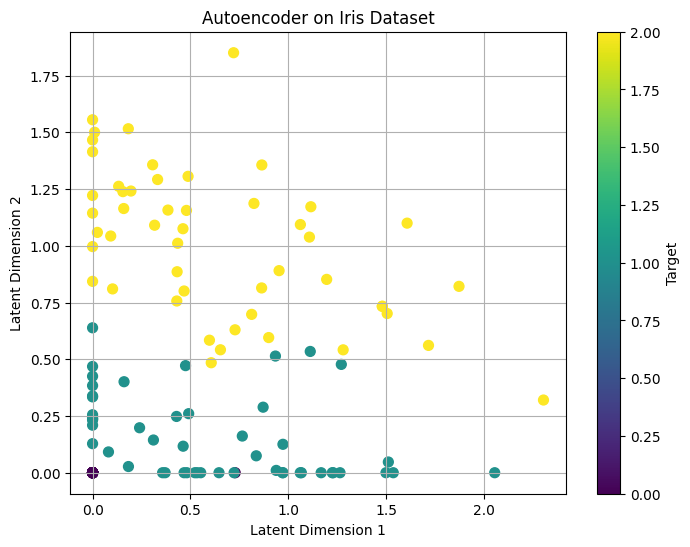

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


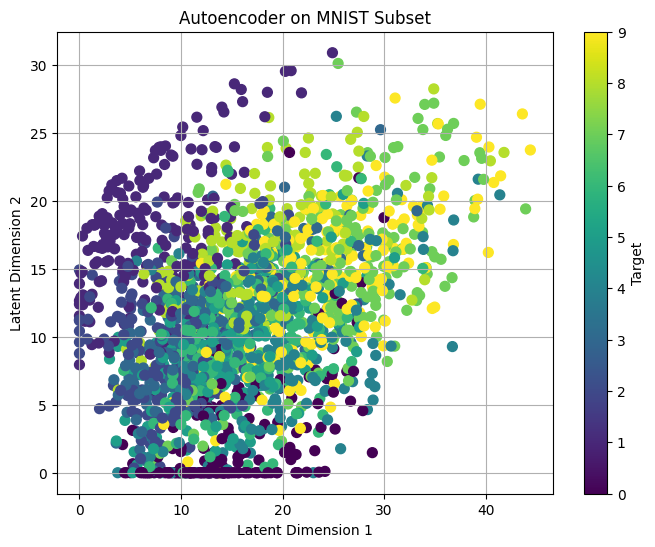

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a function to build and visualize autoencoders
def apply_autoencoder(data, target, encoding_dim=2, title="Autoencoder Visualization"):
    input_dim = data.shape[1]

    # Encoder
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)

    # Decoder
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    # Build the autoencoder
    autoencoder = models.Model(input_layer, decoded)
    encoder = models.Model(input_layer, encoded)  # Separate encoder for visualization

    # Compile the autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder
    autoencoder.fit(data, data, epochs=50, batch_size=32, shuffle=True, verbose=0)

    # Apply the encoder to reduce dimensions
    reduced_data = encoder.predict(data)

    # Visualize the reduced dimensions
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Target')
    plt.title(title)
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.grid(True)
    plt.show()

# Apply Autoencoder on Iris dataset
apply_autoencoder(iris_data_scaled, iris_target, encoding_dim=2, title="Autoencoder on Iris Dataset")

# Apply Autoencoder on MNIST (subset of 2000 samples for faster computation)
apply_autoencoder(X_train[:subset_size], y_train[:subset_size], encoding_dim=2, title="Autoencoder on MNIST Subset")


## Compare the Results of Dimensionality Reduction Techniques

 We applied several techniques to two datasets: the tabular Iris dataset and the image-based MNIST dataset. Here, we summarize the performance of these techniques based on cluster separation, preservation of data structure, computation time, and suitability for the dataset.

1. Techniques and Observations
LLE (Locally Linear Embedding):

Iris: Performed well in preserving local relationships but struggled with overlapping clusters.
MNIST: Captured local neighborhoods effectively but required careful parameter tuning.
Notes: Best for datasets where local proximity is crucial.
t-SNE (t-Distributed Stochastic Neighbor Embedding):

Iris: Created distinct clusters but occasionally mixed boundaries.
MNIST: Delivered exceptional cluster separation, particularly for digits, but was computationally expensive.
Notes: Highly effective for visualizing non-linear data structures.
ISOMAP:

Iris: Preserved global geometry but produced moderate cluster separation.
MNIST: Performed similarly to LLE but struggled with some overlapping clusters.
Notes: Suitable for datasets with clear global structure.
UMAP (Uniform Manifold Approximation and Projection):

Iris: Delivered compact and interpretable clusters.
MNIST: Balanced local and global structure with excellent computational efficiency.
Notes: A strong alternative to t-SNE for large datasets.
Randomized PCA:

Iris: Preserved linear relationships and provided moderate separation.
MNIST: Struggled with the non-linear nature of image data.
Notes: Best for linearly separable datasets.
Kernel PCA:

Iris: Improved upon standard PCA by capturing non-linear patterns.
MNIST: Handled non-linear data better than Randomized PCA but required more computation.
Notes: Effective for datasets with complex structures.
Incremental PCA:

Iris: Performed similarly to standard PCA.
MNIST: Efficiently handled large subsets with linear dimensionality reduction.
Notes: Suitable for memory-constrained environments.
Factor Analysis:

Iris: Weak cluster separation with poor representation of latent factors.
MNIST: Limited capability to capture complex relationships in high-dimensional data.
Notes: Less effective compared to other techniques.
Autoencoders:

Iris: Created compact latent representations with moderate separation.
MNIST: Excelled in capturing non-linear relationships and produced distinct digit clusters.
Notes: Highly effective for high-dimensional and non-linear datasets.
2. Summary and Insights
Best for Tabular Data (Iris): UMAP and t-SNE provided the best visualizations, with UMAP offering faster computation.
Best for Image Data (MNIST): Autoencoders and t-SNE excelled, capturing non-linear patterns effectively. UMAP performed almost as well with significantly lower computational cost.
Efficiency: Randomized PCA and Incremental PCA were the fastest but struggled with non-linear data.
Versatility: UMAP emerged as the most balanced approach across datasets, combining speed with effective cluster separation.
3. Conclusion
Each technique has unique strengths and weaknesses, and their effectiveness depends on the dataset and desired outcome. For quick and interpretable results, UMAP is recommended. For highly complex structures, t-SNE or Autoencoders may provide deeper insights at the cost of higher computation.









## Implement Dimensionality Reduction Using Databricks

## Set Up Databricks Environment

In [17]:
%pip install scikit-learn umap-learn matplotlib seaborn


##  Load a Dataset

In [18]:
 from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.Series(iris.target, name="species")

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert to DataFrame for compatibility with Databricks
iris_df = pd.DataFrame(data_scaled, columns=iris.feature_names)
iris_df['species'] = target
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


 ## Apply Dimensionality Reduction Techniques

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


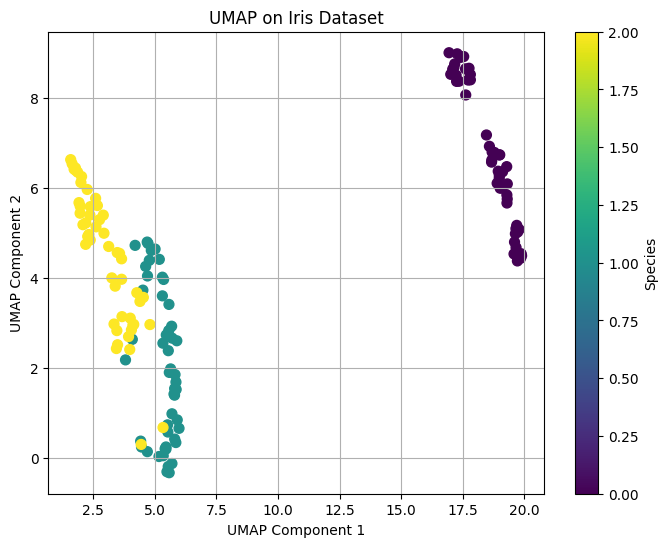

In [19]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
reduced_data = umap_model.fit_transform(data_scaled)

# Convert to DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=['UMAP1', 'UMAP2'])
reduced_df['species'] = target

# Visualize
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_df['UMAP1'], reduced_df['UMAP2'], c=reduced_df['species'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Species')
plt.title("UMAP on Iris Dataset")
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()


## Interactive Visualization in Databricks

In [20]:
display(reduced_df)


,UMAP1,UMAP2,species
0,18.896622,6.105142,0
1,17.012955,8.529616,0
2,17.719067,8.402120,0
3,17.612303,8.650931,0
4,19.295191,5.665360,0
...,...,...,...
145,2.752554,5.294931,2
146,3.436660,2.426673,2
147,3.470743,4.562652,2
148,2.188414,4.745640,2


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['UMAP1'].plot(kind='hist', bins=20, title='UMAP1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['UMAP2'].plot(kind='hist', bins=20, title='UMAP2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['species'].plot(kind='hist', bins=20, title='species')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='UMAP1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='UMAP1', y='UMAP2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='UMAP2', y='species', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['UMAP1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('UMAP1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['UMAP2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('UMAP2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['species']
  ys = series['UMAP1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('species', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('species')
_ = plt.ylabel('UMAP1')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['UMAP1'].plot(kind='line', figsize=(8, 4), title='UMAP1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['UMAP2'].plot(kind='line', figsize=(8, 4), title='UMAP2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['species'].plot(kind='line', figsize=(8, 4), title='species')
plt.gca().spines[['top', 'right']].set_visible(False)